### (Α) Στοιχεία Ομάδος

Η παρακάτω μελέτη διεξήχθη από την ομάδα ΜΑ7:  
**ΚΟΝΤΟΓΙΑΝΝΗΣ ΑΝΔΡΕΑΣ (03115187)  
ΠΕΠΠΑΣ ΠΑΝΑΓΙΩΤΗΣ (03115146)  
ΣΠΥΡΟΥ ΝΙΚΟΛΑΟΣ (03116201)**

### (Β) Εισαγωγή του dataset

Θα μελετήσουμε το S11 dataset, δηλαδή το Quality Assessment of Digital Colposcopies Data Set από το UCI Machine Learning Repository, που περιγράφει την αξιολόγηση της ποιότητας των ψηφιακών κολποσκοπιών από επαγγελματίες ιατρούς του νοσοκομείου Hospital Universitario de Caracas. Πιο αναλυτικά, οι κρίσεις των ιατρών χωρίζονται σε δύο κατηγορίες, bad και good, που προέκυψαν από την κοινή συναίνεση (consensus) έξι ιατρών του νοσοκομείου. Έτσι, το dataset μας περιέχει labeled samples, όπου το καθένα ανηκεί σε μία από τις δυο παραπάνω κατηγορίες, bad(0) ή good(1). Έτσι, η μελέτη μας ανάγεται σε **binary classification problem**.  Παρακάτω, θα δούμε πιο αναλυτικά τι περιέχει το dataset.  
Για την διευκόλυνση του αναγνώστη, έχει γίνει κατηγοριοποίηση του περιεχομένου σε sessions, που μπορεί να δει ανοίγοντας το "Table of contents".

In [0]:
!pip install sklearn

Αρχικά, διαβάζουμε το .csv αρχείο του dataset και διαπιστώνουμε πως περιέχει 287 samples, με 62 features το καθένα, κανονική αρίθμηση γραμμών και ετικέτες στις στήλες. Ακόμα, βλέπουμε πως δεν περιέχει NaN απουσιάζουσες τιμές ούτε μη διατεταγμένα χαρακτηριστικά, κάτι που διευκόλυνε αρκετά την προεπεξεργασία των δεδομένων. Τέλος, μετρήσαμε την ισορροπία των δεδομένων, δηλ. τις αναλογίες των δυο κατηγοριών, και πήραμε 25%-75%. Όπως καταλαβαίνουμε, η παραπάνω αναλογία μας οδηγεί στο συμπέρασμα ότι πρόκειται για ένα καθαρά imbalanced dataset και έτσι, όπως θα δούμε παρακάτω, θα χρειαστεί να χρησιμοποιήσουμε μεθόδους oversampling για την εξισορρόπησή του.

In [0]:
import time
import pandas as pd
import numpy as np

df1 = pd.read_csv("green.csv", header=None)
#print(df1.shape)

df2 = pd.read_csv("hinselmann.csv", header=None)
#print(df2.shape)

df3 = pd.read_csv("schiller.csv", header=None)
#print(df3.shape)

df1 = df1.iloc[1:]
df2 = df2.iloc[1:]
df3 = df3.iloc[1:]
df = pd.concat([df1, df2, df3])
# Check for NaN
print("#NaN in dataset = " + str(np.sum(np.sum(df.isna()))))

data = np.array(df)
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    data[i][j] = float(data[i][j])

# Features
X = data[:, 0:62]
print("X shape: " + str(X.shape))
# Targets: 62-68 -- 6 experts and the consensus
Yall = data[:, 62:]
# Target -- attribute: consensus (68)
y = data[:, 68]
y = y.astype(int)

print("y shape (consensus target): " + str(y.shape))

n_samples = X.shape[0]
n_features = X.shape[1]
n_labels = len(y)

# Ισορροπια dataset (binary classification)
count_zeros = np.sum([y==0])
count_ones = np.sum([y==1])
print("\nDataset Balance")
print("#labeled zeros: " + str(count_zeros))
print("#labeled ones: " + str(count_ones))
print("Zeros percent: " + str( 100 * count_zeros / (count_zeros + count_ones) ) + " %")
print("Ones percent: " + str( 100 * count_ones / (count_zeros + count_ones) ) + " %")

#NaN in dataset = 0
X shape: (287, 62)
y shape (consensus target): (287,)

Dataset Balance
#labeled zeros: 71
#labeled ones: 216
Zeros percent: 24.738675958188153 %
Ones percent: 75.26132404181185 %


Στο σημείο αυτό, αφού έχουμε λάβει σε καλή μορφή το αρχικό dataset, πρέπει να το διαχωρίσουμε σε train και test, με αντίστοιχες αναλογίες 80%-20%. Ωστόσο, αξίζει να σημειωθεί ότι δεν κάνουμε shuffle κατά την διάρκεια του σπασίματος, καθώς οι αναλογίες τόσο στο train όσο και στο test είναι ίδιες, δηλ 25%-75%. Αρκεί να κάνουμε ένα προσεκτικό oversampling στην συνέχεια και να αποφύγουμε την περίπτωση του overfitting.

In [0]:
from sklearn.model_selection import train_test_split

# Split Dataset: 20% Testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# Training set Balance (binary classification)
count_zeros = np.sum([y_train==0])
count_ones = np.sum([y_train==1])
print("Trainset Balance")
print("#labeled zeros: " + str(count_zeros))
print("#labeled ones: " + str(count_ones))
print("Zeros percent: " + str( 100 * count_zeros / (count_zeros + count_ones) ) + " %")
print("Ones percent: " + str( 100 * count_ones / (count_zeros + count_ones) ) + " %")
print()

# Test set Balance (binary classification)
count_zeros = np.sum([y_test==0])
count_ones = np.sum([y_test==1])
print("Testset Balance")
print("#labeled zeros: " + str(count_zeros))
print("#labeled ones: " + str(count_ones))
print("Zeros percent: " + str( 100 * count_zeros / (count_zeros + count_ones) ) + " %")
print("Ones percent: " + str( 100 * count_ones / (count_zeros + count_ones) ) + " %")

Trainset Balance
#labeled zeros: 56
#labeled ones: 173
Zeros percent: 24.45414847161572 %
Ones percent: 75.54585152838428 %

Testset Balance
#labeled zeros: 15
#labeled ones: 43
Zeros percent: 25.862068965517242 %
Ones percent: 74.13793103448276 %


In [0]:
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))

X_train shape: (229, 62)
X_test shape: (58, 62)


### (Γ) Baseline Classification

#### **Dummy Classifier**

Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:

“uniform”: προβλέπει τυχαία και ομοιόμορφα.   
“constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.  
“most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.  
“stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Dummy Classifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified") 
#
# Training and accuracy Scoring
accuracy = {}
dc_uniform.fit(X_train, y_train)
accuracy['uniform (random) \t'] = dc_uniform.score(X_test, y_test)
model = dc_constant_0.fit(X_train, y_train)
accuracy['constant 0 \t\t'] = dc_constant_0.score(X_test, y_test)
model = dc_constant_1.fit(X_train, y_train)
accuracy['constant 1 \t\t'] = dc_constant_1.score(X_test, y_test)
model = dc_most_frequent.fit(X_train, y_train)
accuracy['most frequent label \t'] = dc_most_frequent.score(X_test, y_test)
model = dc_stratified.fit(X_train, y_train)
accuracy['stratified \t\t'] = dc_stratified.score(X_test, y_test)
 
print("Classification Accuracy on the given Dataset (20% test set)\n")
sorted_accuracy = [(k, accuracy[k]) for k in sorted(accuracy, key=accuracy.get, reverse=True)]
print("Dummy Classifiers Scores")
for clf, score in sorted_accuracy:
  print(str(clf) + ": ", score)
print()

y_pred1 = dc_uniform.predict(X_test)
y_pred2 = dc_constant_0.predict(X_test)
y_pred3 = dc_constant_1.predict(X_test)
y_pred4 = dc_most_frequent.predict(X_test)
y_pred5 = dc_stratified.predict(X_test)
label_names = ["bad", "good"]

Classification Accuracy on the given Dataset (20% test set)

Dummy Classifiers Scores
constant 1 		:  0.7413793103448276
most frequent label 	:  0.7413793103448276
uniform (random) 	:  0.6551724137931034
stratified 		:  0.603448275862069
constant 0 		:  0.25862068965517243



Όπως βλέπουμε ο constant-1 και ο most frequent label δίνουν αποτέλεσμα πάντα 1, ενώ ο constant-0 πάντα 0. Οι uniform και stratified έτυχε να δώσουν ίδιο score.

Παρακάτω, δημιουργήσαμε μια συνάρτηση για να τυπώνει το confusion matrix, τα f1-micro, f1-macro, καθώς και το classification report για τους ταξινομητές ορίσματα της.

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

def score(y_pred, y_test, name, label_names):
  cnf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix: " + name)
  df_confusion_matrix = pd.DataFrame(cnf_matrix, index=["bad", "good"], columns=["Predicted bad", "Predicted good"]) 
  print(df_confusion_matrix)
  print()
  # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
  print("F1 micro")
  f1_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')
  print(f1_micro, "\n")
  # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
  print("F1 macro")
  f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')
  print(f1_macro, "\n")
  print()
  print("Classification Report of " + name)
  print()
  print(classification_report(y_test, y_pred, target_names=label_names))

  # Return accuracy F1 scores
  return (f1_micro[2], f1_macro[2])


In [0]:
classifiers_f1_micro = []
classifiers_f1_macro = []
f1_scores = score(y_pred1, y_test, "Dummy Classifier Uniform", label_names)
classifiers_f1_micro.append(f1_scores[0])
classifiers_f1_macro.append(f1_scores[1])

Confusion Matrix: Dummy Classifier Uniform
      Predicted bad  Predicted good
bad              12               3
good             21              22

F1 micro
(0.5862068965517241, 0.5862068965517241, 0.5862068965517241, None) 

F1 macro
(0.6218181818181818, 0.6558139534883721, 0.573529411764706, None) 


Classification Report of Dummy Classifier Uniform

              precision    recall  f1-score   support

         bad       0.36      0.80      0.50        15
        good       0.88      0.51      0.65        43

    accuracy                           0.59        58
   macro avg       0.62      0.66      0.57        58
weighted avg       0.75      0.59      0.61        58



Προφανώς, τα παραπάνω αποτελέσματα είναι βγαλμένα με τυχαία τρόπο.

In [0]:
f1_scores = score(y_pred2, y_test, "Dummy Classifier Constant-0", label_names)
classifiers_f1_micro.append(f1_scores[0])
classifiers_f1_macro.append(f1_scores[1])

Confusion Matrix: Dummy Classifier Constant-0
      Predicted bad  Predicted good
bad              15               0
good             43               0

F1 micro
(0.25862068965517243, 0.25862068965517243, 0.25862068965517243, None) 

F1 macro
(0.12931034482758622, 0.5, 0.20547945205479454, None) 


Classification Report of Dummy Classifier Constant-0

              precision    recall  f1-score   support

         bad       0.26      1.00      0.41        15
        good       0.00      0.00      0.00        43

    accuracy                           0.26        58
   macro avg       0.13      0.50      0.21        58
weighted avg       0.07      0.26      0.11        58



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
f1_scores = score(y_pred3, y_test, "Dummy Classifier Constant-1", label_names)
classifiers_f1_micro.append(f1_scores[0])
classifiers_f1_macro.append(f1_scores[1])

Confusion Matrix: Dummy Classifier Constant-1
      Predicted bad  Predicted good
bad               0              15
good              0              43

F1 micro
(0.7413793103448276, 0.7413793103448276, 0.7413793103448276, None) 

F1 macro
(0.3706896551724138, 0.5, 0.42574257425742573, None) 


Classification Report of Dummy Classifier Constant-1

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        15
        good       0.74      1.00      0.85        43

    accuracy                           0.74        58
   macro avg       0.37      0.50      0.43        58
weighted avg       0.55      0.74      0.63        58



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Στους constant dummy το precision είναι πάντα ίσο με την ισορροπία του test, ενώ το recall είναι 1.00 για το label που ταυτίζεται με την constant σταθερά.

In [0]:
f1_scores = score(y_pred4, y_test, "Dummy Classifier Most Frequent", label_names)
classifiers_f1_micro.append(f1_scores[0])
classifiers_f1_macro.append(f1_scores[1])

Confusion Matrix: Dummy Classifier Most Frequent
      Predicted bad  Predicted good
bad               0              15
good              0              43

F1 micro
(0.7413793103448276, 0.7413793103448276, 0.7413793103448276, None) 

F1 macro
(0.3706896551724138, 0.5, 0.42574257425742573, None) 


Classification Report of Dummy Classifier Most Frequent

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        15
        good       0.74      1.00      0.85        43

    accuracy                           0.74        58
   macro avg       0.37      0.50      0.43        58
weighted avg       0.55      0.74      0.63        58



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
f1_scores = score(y_pred5, y_test, "Dummy Classifier Stratified", label_names)
classifiers_f1_micro.append(f1_scores[0])
classifiers_f1_macro.append(f1_scores[1])

Confusion Matrix: Dummy Classifier Stratified
      Predicted bad  Predicted good
bad               1              14
good              9              34

F1 micro
(0.603448275862069, 0.603448275862069, 0.603448275862069, None) 

F1 macro
(0.4041666666666667, 0.42868217054263563, 0.4136263736263736, None) 


Classification Report of Dummy Classifier Stratified

              precision    recall  f1-score   support

         bad       0.10      0.07      0.08        15
        good       0.71      0.79      0.75        43

    accuracy                           0.60        58
   macro avg       0.40      0.43      0.41        58
weighted avg       0.55      0.60      0.57        58



Τα αποτελέσματα του recall και precision για τον stratified είναι πολύ κοντά στην ισορροπία του dataset. Κάτι που περιμέναμε, αφού ο Stratified Dummy στο binary classification αντιστοιχείζεται σε ένα μη τίμιο νόμισμα με πιθανότητα κορώνας και γράμματα αντίστοιχα με την ισορροπία του dataset και όσο μεγαλώνει το πλήθος των samples τόσο τα ποσοστά κορώνας θα τείνουν στην a priori πιθανότητα.

####**k-nearest neighbors classifier**



O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$
Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. 

Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test,  πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).

Όσο το k μικραίνει αυτό σημαίνει πως ο knn προσαρμόζεται πιο πολύ στο train set. 
Όσο πιο κοντά στο 1 πηγαίνει τόσο πιο πολύ high variance έχουμε, δηλαδή το μοντέλο δεν είναι τόσο γενικό, αλλά είναι πολύ fit στο training set. Όσο το k αυξάνει τόσο οι προβλέψεις γίνονται πιο σταθερές στην πλειψηφία των τιμών και της μέσης τιμής με αποτέλεσμα να έχουμε περισσοτερές επιτυχημένες προβλέψεις.Συνεχίζοντας να αυξάνει το k ξεκινάμε να έχουμε αρκετές αποτυχίες όμως. Αυτό είναι το σημείο που θεωρητικά πρέπει να σταματήσουμε να αυξάνουμε το k και αρκετές φορές είναι κοντά στο $\sqrt{N}$

Δοκιμάσαμε ακόμα τον default k-nearest-neighbors, δηλ. για n_neighbors=5 και πήραμε τα παρακάτω αποτελέσματα:

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# default n_neighbors=5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1_scores = score(y_pred, y_test, "K-Nearest Neighbors", label_names)
classifiers_f1_micro.append(f1_scores[0])
classifiers_f1_macro.append(f1_scores[1])

Confusion Matrix: K-Nearest Neighbors
      Predicted bad  Predicted good
bad               3              12
good              5              38

F1 micro
(0.7068965517241379, 0.7068965517241379, 0.7068965517241379, None) 

F1 macro
(0.5675, 0.541860465116279, 0.53903693314633, None) 


Classification Report of K-Nearest Neighbors

              precision    recall  f1-score   support

         bad       0.38      0.20      0.26        15
        good       0.76      0.88      0.82        43

    accuracy                           0.71        58
   macro avg       0.57      0.54      0.54        58
weighted avg       0.66      0.71      0.67        58



Παρατηρούμε ότι το precision του bad ειναι πιο μεγάλο από το recall του, αφού το μοντέλο μας πολύ πιο εύκολα δίνει αποτέλεσμα good από bad.
Θέλουμε, λοιπόν, με κάποιο τρόπο να αυξήσουμε το recall του bad, αφού είναι πολύ εύκολο το μοντέλο μας να βγάζει πιο συχνά 1, λόγω της ανισορροπίας του dataset, αλλά και, από την άλλη, να αυξήσουμε και το recall του good, καθώς βλέπουμε πως υπάρχουν και κάποιοι 1 που τους προβλέπουμε ως 0. 


Στο σημείο αυτό, τυπώνουμε σε κοινό διάγραμμα, ένα για f1-micro και ένα για f1-macro scores, τα scores των παραπάνω ταξινομητών.

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Plot bar for f1_micro and f1_macro
def plot_bar(classifiers, scores, title):
  y_pos = np.arange(len(classifiers))
  plt.bar(y_pos, scores, align='center', alpha=0.9)
  plt.xticks(y_pos, classifiers)
  plt.ylabel('Score')
  plt.title(title)
  plt.show()

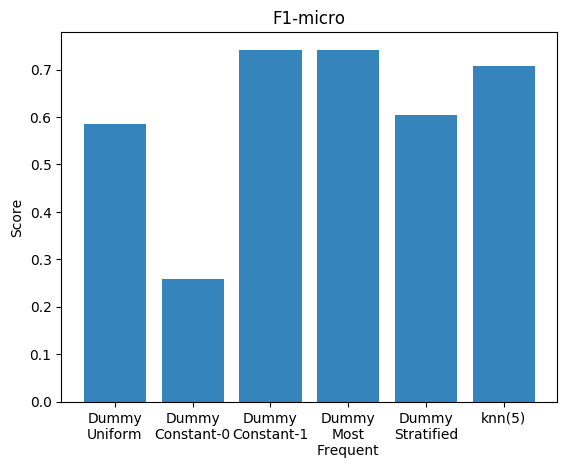

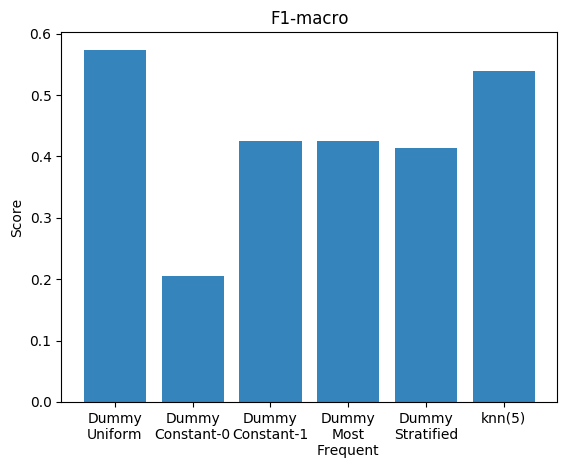

In [0]:
classifiers = ('Dummy\nUniform', 'Dummy\nConstant-0', 'Dummy\nConstant-1', 'Dummy\nMost\nFrequent', 'Dummy\nStratified', 'knn(5)')
plot_bar(classifiers, classifiers_f1_micro, "F1-micro")
plot_bar(classifiers, classifiers_f1_macro, "F1-macro")

#### Σχολιασμός αποτελεσμάτων

Από τα παραπάνω διαγράμματα, βλέπουμε ότι ο knn, αν και δεν παραγεί αποτελέσματα στην τύχη ή σταθερά κάποιο label, όπως ο dummy classifier, βγάζει χειρότερο score. Αυτό συμβαίνει γιατί το dataset είναι αρκετά imbalanced με πολύ λίγα samples.   
Στόχος μας, λοιπόν, σε αυτή την μελέτη είναι να βελτιστοποιήσουμε τον knn όσο περισσότερο γίνεται, ώστε να ξεπεράσει σε score τον καλύτερο, από τους παραπάνω, dummy classifiers. Δηλαδή, θα χρησιμοποιήσουμε το score του dummy classifier ως ένα μέτρο βελτίωσης του knn, δεδομένου ότι έχουμε πολύ μικρό αριθμό δεδομένων και τα bad είναι το 1/3 των good.

###(Δ)  Βελτιστοποίηση ταξινομητών

####Regularization

Αρχικά, ελέγχουμε αν τα δεδομένα μας είναι ήδη κανονικοποιημένα regularized.

In [0]:
def checkScaled(data):
  flag = True
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      if (data[i][j] < 0 or data[i][j] > 1):
        flag = False
        break
      if (not flag):
        break

  if (flag):
    print("Regularized")
  else:
    print("No scaled")

In [0]:
checkScaled(X_train)

No scaled


Βλέπουμε πως δεν είναι κανονικοποιημένα και τα κανονικοποιούμε.

In [0]:
def regularization(data):
  return ( data - np.min(data) ) / ( np.max(data) - np.min(data) )

# Regularization, Scaled
X_train_scaled = regularization(X_train)
X_test_scaled = regularization(X_test)
checkScaled(X_train_scaled)

Regularized


#### PCA

Αρχικά υπολογίζουμε τον πίνακα συσχέτισης (covariance matrix) των μεταβλητών που έχουμε στα δεδομένα. Από αυτόν τον πίνακα βρίσκουμε τις γραμμικώς συσχετισμένες μεταβλητές και βρίσκοντας τα ιδιοδιανύσματα του πίνακα μπορούμε να μετατρέψουμε τον πίνακα με έναν ορθογώνιο μετασχηματισμό και να βρούμε την βάση του νέου πίνακα. Αυτή η βάση του χώρου αποτελεί ένα νέο σύνολο μεταβλητών που είναι γραμμικά ασυσχέτιστες και ονομάζονται κύριες συνιστώσες.

Στο σημείο αυτό, θα χρησιμοποιήσουμε αρκετές διαφορετικές εκδοχές του PCA, δημιουργώντας έτσι διαφορετικά datasets, με n_components από το 2 εώς το 60 με βήμα 2 για κάθε dataset. Έτσι, θα μελετήσουμε τελικά 30 διαφορετικά datasets, προερχόμενα από διαφορετικό PCA, και το αρχικό που δεν έχει υποστεί PCA.

In [0]:
from sklearn.decomposition import PCA

def applyPCA(X_train, X_test, n):
  # Returns a tuple (X_train_pca, X_test_pca)
  pca = PCA(n_components=n)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  return (X_train_pca, X_test_pca, n)


In [0]:
# A list[...] of tuples: (X_train_pca, X_test_pca, n)
dataPCA = []

# Apply PCA for the first (n_features-1) even integers
for n in range(n_features+1):
  if (n == 0):
    continue
  if (n == n_features):
    # No PCA
    dataPCA.append((X_train_scaled, X_test_scaled, n))
    break
  if (n % 2 == 0):
    dataPCA.append(applyPCA(X_train_scaled, X_test_scaled, n))

initial_data_PCA = dataPCA.copy()

#### Oversampling

Με τον όρο imbalanced dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο.   

Έχουμε δύο βασικούς τρόπους για να εξισσοροπούμε ένα dataset, την υποδειγματοληψία (undersampling) και την υπερδειγματοληψία (oversampling). Εν ολίγοις, στο undersampling απλά αφαιρούμε δείγματα από όλες τις κατηγορίες που έχουν μεγαλύτερο πλήθος από τη μικρότερη, ενώ στο oversampling επιλέγουμε  ορισμένα παραδείγματα ή όμοια με αυτά από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Στην πρώτη δηλαδή αφαιρούμε δεδομένα ενώ στην άλλη προσθέτουμε.

Γενικά το oversampling ενδείκνυται περισσότερο στην περίπτωσή μας, αφού έχουμε πάρα πολύ λίγα samples.

Η βιβλιοθήκη imbalanced-learn (ή imblearn) προσφέρει πολλές μεθόδους εξισορρόπησης datasets. Αφού εγκαταστήσουμε την imblearn θα πειραματιστούμε με το random oversampling, καθώς και με το SMOTE oversampling στο training set μας.

##### Random Oversampling

  Στο Random oversampling, δείγματα της μειοψηφίας με τυχαίο τρόπο επιλέγονται και γίνονται duplicates έως ότου, η ισορροπία του dataset φθάσει στα επιθυμητά επιπέδα ισορροπίας. Η μέθοδος αυτή έχει το κακό ότι δημιουργεί ήδη υπάρχοντα δείγματα, με αποτέλεσμα να αυξάνεται ο κίνδυνος του overfitting, ειδικά στην περίπτωση που το oversamping συμβαίνει πριν το GridSearch και το cross-validation, όπως θα δούμε στην συνέχεια.

In [0]:
from imblearn.over_sampling import RandomOverSampler

# Random Oversampling
def applyRandomOversampling(X_train_pca, y_train):
  # Returns a tuple (X_train_resampled, y_train_resampled)

  # print("Before applying oversampling")
  # print("Ones are now:")
  # print(np.sum([y_train==1]))
  # print("Zeros are now:")
  # print(np.sum([y_train==0]))
  # print() 

  ros = RandomOverSampler(sampling_strategy=0.42, random_state=0)

  # Oversampling
  X__train_resampled, y_train_resampled = ros.fit_sample(X_train_pca, y_train)

  # print("After applying oversampling")
  # print("X_train_resampled shape: ", X__train_resampled.shape)
  # print("y_train_resampled shape: ", y_train_resampled.shape)

  #print(X__train_resampled)
  #print(y_train_resampled)

  # print("Ones are now:")
  # print(np.sum([y_train_resampled==1]))
  # print("Zeros are now:")
  # print(np.sum([y_train_resampled==0]))
  # print()

  return (X__train_resampled, y_train_resampled)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


##### SMOTE oversampling

Παρακάτω, θα γίνει χρήση του SMOTE oversampling, που είναι εγγυάται περισσότερο την αποφυγή overfitting με χρήση κατάλληλου sampling_strategy. Πιο αναλυτικά, ο SMOTE oversampling προσθέτει και αυτός samples, αλλά όχι ήδη υπάρχοντα. Χρησιμοποιεί για κάθε δείγμα της μειοψηφίας τον knn και βρίσκει τα κ πιο κοντινά του δείγματα. Αναλόγως το sampling_strategy που έχουμε θέσει, για κάθε δείγμα της μειοψηφίας, επιλέγει μερικά από αυτά τα κ κοντινά δείγματα για να δημιουργήσει νέα, επιλέγοντας για καθένα ένα τυχαίο σημείο πάνω στην ευθεία που το συνδέει με αυτό που του ασκείθηκε ο knn.

In [0]:
from imblearn.over_sampling import SMOTE 

#  Synthetic Minority Oversampling Technique (SMOTE)
def applySMOTE(X_train_pca, y_train):
  # Returns a tuple (X_train_resampled, y_train_resampled)

  # print("Before applying oversampling")
  # print("Ones are now:")
  # print(np.sum([y_train==1]))
  # print("Zeros are now:")
  # print(np.sum([y_train==0]))
  # print() 

  sm = SMOTE(sampling_strategy=0.54, random_state=32) 

  # Oversampling
  X__train_resampled, y_train_resampled = sm.fit_sample(X_train_pca, y_train)

  # print("After applying oversampling")
  # print("X_train_resampled shape: ", X__train_resampled.shape)
  # print("y_train_resampled shape: ", y_train_resampled.shape)

  #print(X__train_resampled)
  #print(y_train_resampled)

  # print("Ones are now:")
  # print(np.sum([y_train_resampled==1]))
  # print("Zeros are now:")
  # print(np.sum([y_train_resampled==0]))
  # print()

  return (X__train_resampled, y_train_resampled)

Στην μελέτη μας, χειρηστικάμε πολύ τόσο το random όσο και το SMOTE και εξαιτίας του πολύ μικρού αριθμού των samples, το smote έβγαζε αρκετά καλύτερα αποτελέσματα από το random. Έτσι, θα δείξουμε μόνο την μέθοδο του SMOTE oversampling που έβγαζε και τα καλύτερα αποτελέσματα.

In [0]:
# Apply ovesampling on the scaled-PCA-transformed training sets
y_train_sampled = []
for i in range(0, len(dataPCA)):
  (X_over, y_sampled_tmp) = applySMOTE(dataPCA[i][0], y_train)
  y_train_sampled.append(y_sampled_tmp)
  dataPCA[i] = (X_over, dataPCA[i][1], dataPCA[i][2])

#### Plot

Παρακάτω, πλοτάρουμε την κατανομή των δειγμάτων για PCA(2) σε δυσδιάστατο χώρο μετά την εφαρμογή του SMOTE oversampling.

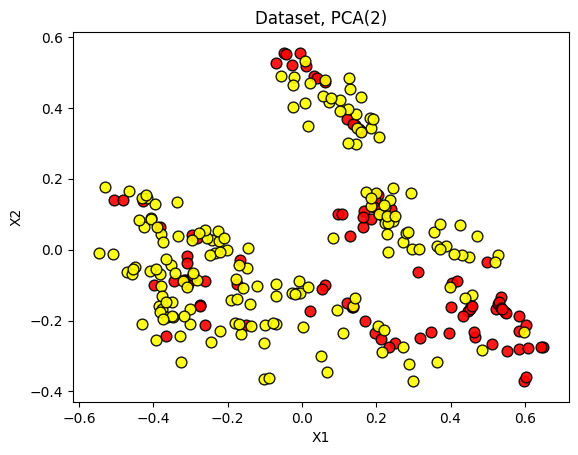

In [0]:
# Plot training set for PCA(n_components=2)

X0, X1 = dataPCA[0][0][:,0], dataPCA[0][0][:,1]
colors = ['red', 'yellow']
fig, ax = plt.subplots()
for label in range(2):
    ax.scatter(
        X0[y_train_sampled[0] == label], X1[y_train_sampled[0] == label],
        c=(colors[int(label)]), label=int(label),
        s=60, alpha=0.9, edgecolors='k'
    )
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Dataset, PCA(2)')
plt.show()

#### **Optimizing k-nearest neighbors classifier**

Χρησιμοποίησαμε τις εξής δυο διαφορετικές τεχνικές:  
- PCA-Oversampling-GridSearch-CV
- PCA-GridSearch-CV-Oversampling  
   
Στην πρώτη, το oversampling, πραγματοποιείται πριν το GridSearch, κάτι που 
περιμένουμε να δώσει μη βέλτιστα αποτελέσματα, αφού η δημιουργία duplicates      (Random) ή γειτονικών δειγμάτων (SMOTE) γίνεται πριν τη δημιουργία του cross-validation, με αποτέλεσμα να υπάρχει μεγάλη πιθανότητα να βρεθούν ίδια ή πολύ παρόμοια δείγματα τόσο στο train όσο και το test set του cross-validation. Αυτό έχει ως αποτέλεσμα σε κάθε fold του cv, το μοντέλο μας να τεστάρει δείγματα που έχει ήδη δει στην εκπαίδευσή του, με χρήση ειδικά του Random oversampling, με αποτέλεσμα να επιλέγει πάντα το πιο μικρό διαθέσιμο k για μεγάλο sampling_strategy (κοντά στο 1.0), και να καταλήγουμε εύκολα σε overfitting και high variance του Knn, με μεγάλες τιμές του cross-validation score (έως και στο 90%) και πολύ μικρές τιμές του test score (έως και 48%). Έτσι, αν και λάθος σκέψη, θελήσαμε να βελτιστοποιήσουμε και αυτό το μοντέλο για χάριν έρευνας και φθάσαμε σε αρκετά καλά αποτελέσματα που θα δείξουμε παρακάτω. 

Στην δεύτερη περίπτωση, το oversampling, πραγματοποιείται μέσα στο cross-validation, μέσα στο GridSearch, προς αποφυγή της κατάστασης που περιγράφηκε παραπάνω. Χρησιμοποιήσαμε και Random και SMOTE, πειραματιζόμενη και εδώ με το sampling_strategy, με το SMOTE να υπερνικά πάντοτε, και έτσι κρατήσαμε μόνο τις περιπτώσεις αυτού.  
  
Αξίζει να σημειωθεί ότι το PCA και στις δυο περιπτώσεις έγινε στην αρχή και πάντα πριν το oversampling και το GridSearch, θεωρώντας ότι η προσθήκη/μείωση των δειγμάτων θα επιφέρει και αλλαγές στις συνδιακυμάνσεις του αρχικού συνόλου δεδομένων. Ωστόσο, για χάριν έρευνας, στο big set θα δοκιμαστεί και μέσα στο Pipeline, μετά το sampling, δείχνοντας να μην επηρεάζει σημαντικά τα αποτελέσματα του από αυτά της παραπάνω μεθόδου.  
  
Επιπλέον και στις δυο περιπτώσεις δημιουργούμε την δική μας class για τα δυο διαφορετικά GridSearch, με το ένα να δέχεται μια lambda function ως όρισμα, η οποία θα ειναι η oversampling method που θα χρησιμοποιηθεί στο cross-validation, ενώ διαθέτουν και οι δυο τις βασικές μεθόδους fit, predict, score που έχει οποιοσδήποτε sklearn classifier.



##### **GridSearch using KFold Cross-Validation**




In [0]:
def split_train(X_train, y_train, n_splits=10):
  # Split training set into KFold splits
  '''
    X_splits, y_splits: lists of numpy arrays
  '''
  X_splits = []
  y_splits = []
  split_size = X_train.shape[0] // n_splits
  count = 0
  tempX = []
  tempY = []
  for i in range(X_train.shape[0]):
    tempX.append(list(X_train[i]))
    tempY.append(y_train[i])
    if (count == split_size or i == X_train.shape[0]-1):
      X_splits.append(np.array(tempX.copy()))
      y_splits.append(np.array(tempY.copy()))
      tempX = []
      tempY = []
      count = 0
      continue
    count += 1

  return X_splits, y_splits

In [0]:
def concatCV(cv_list):
  # Concatenate X_splits, y_splits
  cv = cv_list[0]
  for i in range(1, len(cv_list)):
    cv = np.concatenate((cv, cv_list[i]), axis=0)

  return cv

In [0]:
import itertools

def unpackParams(param_grid):
  # Unpack params_grid to list of dicts of paramaters for GridSearchCV sklearn format
  dicts = []
  for dict_item in param_grid:
    keys = list(dict_item.keys())
    values = list(dict_item.values())
    cartesian_values = list(itertools.product(*values))
    for tup in cartesian_values:
      temp_dict = {}
      for i in range(len(tup)):
        temp_dict[keys[i]] = tup[i]
      dicts.append(temp_dict)
    
  return(dicts)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.base import BaseEstimator, ClassifierMixin

class gridSearchCV(BaseEstimator, ClassifierMixin):
  # GridSearch classifier to find the optimized hyperparameters of the given classifier using KFolding Cross-Validation
  def __init__(self, clf, param_grid, cv, scoring='micro'):
    ''' 
        clf:        an sklearn classifier for grid of paramaters
        param_grid: a list of dicts of parameters
        cv:         an integer, KFold Cross-Validation
        scoring:    a string, ("f1_micro, "f1_macro")
    '''
    self.clf = []
    self.param_grid = unpackParams(param_grid) # list of dicts
    self.cv = cv
    self.optimal_clf = None
    self.best_params_ = None
    self.cv_results_ = {}
    self.best_score = None
    self.scoring = scoring

    for params in self.param_grid:
      # Clone initial classifier object in order to create new ones
      clf_tmp = clone(clf)
      self.clf.append(clf_tmp.set_params(**params))


  def display_cv_results(self):
    for key in self.cv_results_:
      print(key, ": \t", self.cv_results_[key])
    print()


  def fit(self, X_train, y_train): 
    X, y = split_train(X_train, y_train, self.cv) 

    # Find the optimal classifier
    clfs_scores = []
    for j in range(len(self.clf)):
      classifier_scores = []
      # Running fit for KFold Cross Validation and find the optimal parameters using f1-micro accuracy
      for i in range(self.cv):
        Xcv = X.copy()
        ycv = y.copy()
        X_test = Xcv[i]
        y_test = ycv[i]

        # Delete ith list for the testset and let the rest lists for the trainset
        del Xcv[i]
        del ycv[i]

        # Fit sklearn classifier      
        self.clf[j].fit(concatCV(Xcv), concatCV(ycv))

        # Scoring
        y_pred = self.clf[j].predict(X_test)
        score = precision_recall_fscore_support(y_test, y_pred, average=self.scoring)[2] # f1-micro accuracy score
        classifier_scores.append(score)

      # Compute mean F1-micro score for each classifier for all cross-validation sets
      clfs_scores.append(np.mean(classifier_scores))
      self.cv_results_[str(self.param_grid[j])] = clfs_scores[j]

    # Select the optimal classifier, parameters and best score
    self.best_score = np.max(clfs_scores)
    optimal_clf_index = np.argmax(clfs_scores)
    self.optimal_clf = self.clf[optimal_clf_index]
    self.best_params_ = self.param_grid[optimal_clf_index]

    return self


  def predict(self, X_test):
    return self.optimal_clf.predict(X_test)


  def score(self, X_test, y_true):
    y_pred = self.predict(X_test)
    return precision_recall_fscore_support(y_true, y_pred, average=self.scoring)[2] 

Επιλέγουμε τιμές του $κ>4$, προκειμένου να αποφύγουμε το high variance για τον λόγο που είπαμε και παραπάνω και $strategy=0.55$, για να έχω μικρή επίδραση oversampling.

######F1-micro score

In [0]:
# Run all dataPCA for each grid parameter of KNN
best_score_ = 0
optimal_classifier = None
# Time measure
start_time = time.time()
for i in range(0,len(dataPCA)-20):
  data_tmp = dataPCA[i]
  knn = gridSearchCV(KNeighborsClassifier(), [{"n_neighbors":[5,7,9,11,13,15,17,19,21,27]}], 10)
  knn.fit(data_tmp[0], y_train_sampled[i])
  if (knn.best_score > best_score_):
    best_score_ = knn.best_score
    optimal_classifier = knn
    features = data_tmp[2]
  print("n_features: " + str(data_tmp[2]))
  knn.display_cv_results() 
print("Time executed: ", time.time() - start_time)

n_features: 2
{'n_neighbors': 5} : 	 0.7090177133655394
{'n_neighbors': 7} : 	 0.6922705314009663
{'n_neighbors': 9} : 	 0.6953301127214171
{'n_neighbors': 11} : 	 0.6990338164251206
{'n_neighbors': 13} : 	 0.7243156199677938
{'n_neighbors': 15} : 	 0.7206119162640902
{'n_neighbors': 17} : 	 0.7064412238325282
{'n_neighbors': 19} : 	 0.7138486312399356
{'n_neighbors': 21} : 	 0.72061191626409
{'n_neighbors': 27} : 	 0.7243156199677939

n_features: 4
{'n_neighbors': 5} : 	 0.7201288244766506
{'n_neighbors': 7} : 	 0.7157809983896941
{'n_neighbors': 9} : 	 0.7410628019323672
{'n_neighbors': 11} : 	 0.7249597423510468
{'n_neighbors': 13} : 	 0.7441223832528181
{'n_neighbors': 15} : 	 0.7249597423510467
{'n_neighbors': 17} : 	 0.7360708534621578
{'n_neighbors': 19} : 	 0.7397745571658615
{'n_neighbors': 21} : 	 0.7169082125603865
{'n_neighbors': 27} : 	 0.737842190016103

n_features: 6
{'n_neighbors': 5} : 	 0.7009661835748793
{'n_neighbors': 7} : 	 0.7194847020933978
{'n_neighbors': 9} : 

In [0]:
print("Optimal knn classifier:\t", optimal_classifier.optimal_clf, 
      "\nwith PCA Components =", features,
      "\nand F1-micro accuracy score for cv: \t", optimal_classifier.best_score)

Optimal knn classifier:	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform') 
with PCA Components = 4 
and F1-micro accuracy score for cv: 	 0.7441223832528181


In [0]:
# PCA(features) --> dataPCA[features] --> dataPCA[(features/2)-1]
y_pred = optimal_classifier.predict(dataPCA[int(features/2)-1][1])
# print(y_pred)
# print(y_test)
print(classification_report(y_test, y_pred))
print("Ones in y_test: \t", np.sum([y_test==1]))
print("Zeros in y_test: \t", np.sum([y_test==0]))
top_score1_micro = optimal_classifier.score(dataPCA[int(features/2)-1][1], y_test)
print("F1-micro accuracy score for Testset: \t", top_score1_micro)
print()

# No PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=optimal_classifier.optimal_clf.n_neighbors)
knn_no_pca.fit(dataPCA[30][0], y_train_sampled[30])
y_pred = knn_no_pca.predict(dataPCA[30][1])
print(dataPCA[30][0].shape)
print("Testset F1-micro accuracy score, No PCA, Oversampling: \t", knn_no_pca.score(dataPCA[30][1], y_test))

# No preprocessing
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)
y_pred = knn_no_pca.predict(X_test)
print(X_train.shape)
print("Testset F1-micro accuracy score, No Preprocessing: \t", knn_no_pca.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.76      0.95      0.85        43

    accuracy                           0.74        58
   macro avg       0.63      0.54      0.53        58
weighted avg       0.69      0.74      0.68        58

Ones in y_test: 	 43
Zeros in y_test: 	 15
F1-micro accuracy score for Testset: 	 0.7413793103448276

(266, 62)
Testset F1-micro accuracy score, No PCA, Oversampling: 	 0.6896551724137931
(229, 62)
Testset F1-micro accuracy score, No Preprocessing: 	 0.7068965517241379


Παρατηρούμε ότι αυξήσαμε κατά πολύ το recall του good (1), ενώ μειώσαμε κατά πολύ το recall του bad (0), εξαιτίας του ότι το oversampling έγινε πριν το cv,  με αποτέλεσμα το μοντέλο αυτό να προβλέπει κυρίως (1) και να μην είναι καθόλου ευέλικτος. Ωστόσο, βελτίωσε το f1_micro στο τεστ, διότι και εκεί οι (1) ειναι 3 φορές τα (0). 

######F1-macro score

In [0]:
import warnings
warnings.filterwarnings('ignore')

# Run all dataPCA for each grid parameter of KNN
best_score_ = 0
optimal_classifier = None
# Time measure
start_time = time.time()
for i in range(0,len(dataPCA)-20):
  data_tmp = dataPCA[i]
  knn = gridSearchCV(KNeighborsClassifier(), [{"n_neighbors":[5,7,9,11,13,15,17,19,21,27]}], cv=10, scoring='macro')
  knn.fit(data_tmp[0], y_train_sampled[i])
  if (knn.best_score > best_score_):
    best_score_ = knn.best_score
    optimal_classifier = knn
    features = data_tmp[2]
  print("n_features: " + str(data_tmp[2]))
  knn.display_cv_results() 
print("Time executed: ", time.time() - start_time)

n_features: 2
{'n_neighbors': 5} : 	 0.5692384304192804
{'n_neighbors': 7} : 	 0.5608192132365608
{'n_neighbors': 9} : 	 0.5540713983261769
{'n_neighbors': 11} : 	 0.5358455551265822
{'n_neighbors': 13} : 	 0.5634336669922841
{'n_neighbors': 15} : 	 0.5531139185443265
{'n_neighbors': 17} : 	 0.5395692766417213
{'n_neighbors': 19} : 	 0.5373559523881651
{'n_neighbors': 21} : 	 0.5506064823558553
{'n_neighbors': 27} : 	 0.552805014400252

n_features: 4
{'n_neighbors': 5} : 	 0.6147701222191929
{'n_neighbors': 7} : 	 0.5785356639575995
{'n_neighbors': 9} : 	 0.6086832624170176
{'n_neighbors': 11} : 	 0.5968137000436513
{'n_neighbors': 13} : 	 0.612492139316924
{'n_neighbors': 15} : 	 0.5834742436182038
{'n_neighbors': 17} : 	 0.5927651698147054
{'n_neighbors': 19} : 	 0.5786711671484299
{'n_neighbors': 21} : 	 0.5572922248116703
{'n_neighbors': 27} : 	 0.5818963237714193

n_features: 6
{'n_neighbors': 5} : 	 0.5757780120924314
{'n_neighbors': 7} : 	 0.580462958506603
{'n_neighbors': 9} : 

In [0]:
print("Optimal knn classifier:\t", optimal_classifier.optimal_clf, 
      "\nwith PCA Components =", features,
      "\nand F1-macro accuracy score for cv: \t", optimal_classifier.best_score)

Optimal knn classifier:	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
with PCA Components = 4 
and F1-macro accuracy score for cv: 	 0.6147701222191929


In [0]:
# PCA(features) --> dataPCA[features] --> dataPCA[(features/2)-1]
y_pred = optimal_classifier.predict(dataPCA[int(features/2)-1][1])
# print(y_pred)
# print(y_test)
print(classification_report(y_test, y_pred))
print("Ones in y_test: \t", np.sum([y_test==1]))
print("Zeros in y_test: \t", np.sum([y_test==0]))
top_score1_macro = optimal_classifier.score(dataPCA[int(features/2)-1][1], y_test)
print("F1-macro accuracy score for Testset: \t", top_score1_macro)
print()

# No PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=optimal_classifier.optimal_clf.n_neighbors)
knn_no_pca.fit(dataPCA[30][0], y_train_sampled[30])
y_pred = knn_no_pca.predict(dataPCA[30][1])
print(dataPCA[30][0].shape)
y_pred = knn_no_pca.predict(dataPCA[30][1])
print("Testset F1-macro accuracy score, No PCA, Oversampling: \t",  precision_recall_fscore_support(y_test, y_pred, average='macro')[2])

# No preprocessing
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)
y_pred = knn_no_pca.predict(X_test)
print(X_train.shape)
y_pred = knn_no_pca.predict(X_test)
print("Testset F1-macro accuracy score, No Preprocessing: \t", precision_recall_fscore_support(y_test, y_pred, average='macro')[2])

              precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.76      0.95      0.85        43

    accuracy                           0.74        58
   macro avg       0.63      0.54      0.53        58
weighted avg       0.69      0.74      0.68        58

Ones in y_test: 	 43
Zeros in y_test: 	 15
F1-macro accuracy score for Testset: 	 0.5279435702658709

(266, 62)
Testset F1-macro accuracy score, No PCA, Oversampling: 	 0.4547008547008547
(229, 62)
Testset F1-macro accuracy score, No Preprocessing: 	 0.53903693314633


Όπως βλέπουμε, καταφέραμε να βελτιώσουμε το f1_micro κατα 4% από την default επιλογή του knn σε score που είναι πολύ κοντά και με το score του cv. Ωστόσο, το f1_macro έπεσε ελάχιστα κατά 1% από την default, ενώ το score στο cv ήταν 10% πάνω. Έτσι, καταλαβαίνουμε ότι το μοντέλο αυτό δεν είναι αρκετά σταθερό, αφού κατάφερε να βελτιστοποιήσει ικανοποιητικά το f1_micro αλλά καθόλου το f1_macro. Τέλος, αξίζει να σημειωθεί ότι το μοντέλο αυτό επιλέγει πάντα το μικρότερο διαθέσιμο k ως βέλτιστο, όταν αποφασίζει με βάση το f1_macro, σε αντίθεση με όταν αποφασίζει με βάση το f1_micro, γεγονός που εξηγεί το αδυναμία αυτού του μοντέλου.

##### **GridSearch using KFold Cross-Validation and a sampling method**

In [0]:
from imblearn.over_sampling import SMOTE 

#  Synthetic Minority Oversampling Technique (SMOTE)
def SMOTE_oversampling(X_train_pca, y_train, ratio):
  # Returns a tuple (X_train_resampled, y_train_resampled)

  sm = SMOTE(sampling_strategy=ratio, random_state=32) 

  # Oversampling
  X__train_resampled, y_train_resampled = sm.fit_sample(X_train_pca, y_train)

  return (X__train_resampled, y_train_resampled)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.base import BaseEstimator, ClassifierMixin

class gridSearchCV_oversampling(BaseEstimator, ClassifierMixin):
  # GridSearch classifier to find the optimized hyperparameters of the given classifier using KFolding Cross-Validation
  # Applies Oversampling on cv training set
  def __init__(self, clf, param_grid, cv, sampling, scoring='micro'):
    ''' 
        clf:          an sklearn classifier for grid of paramaters
        param_grid:   a list of dicts of parameters
        cv:           an integer, KFold Cross-Validation
        sampling:     a samling method that will be used on each training set in cv
        scoring:      a string, ("f1_micro, "f1_macro")
    '''
    self.clf = []
    self.param_grid = unpackParams(param_grid) # list of dicts
    self.cv = cv
    self.sampling = sampling
    self.optimal_clf = None
    self.best_params_ = None
    self.cv_results_ = {}
    self.best_score = None
    self.scoring = scoring

    for params in self.param_grid:
      # Clone initial classifier object in order to create new ones
      clf_tmp = clone(clf)
      self.clf.append(clf_tmp.set_params(**params))


  def display_cv_results(self):
    for key in self.cv_results_:
      print(key, ": \t", self.cv_results_[key])
    print()


  def fit(self, X_train, y_train): 
    X, y = split_train(X_train, y_train, self.cv) 

    # Find the optimal classifier
    clfs_scores = []
    for j in range(len(self.clf)):
      classifier_scores = []
      # Running fit for KFold Cross Validation and find the optimal parameters using f1-micro accuracy
      for i in range(self.cv):
        Xcv = X.copy()
        ycv = y.copy()
        X_test = Xcv[i]
        y_test = ycv[i]

        # Delete ith list for the testset and let the rest lists for the trainset
        del Xcv[i]
        del ycv[i]

        # Sampling
        Xcv_sampled, ycv_sampled = self.sampling(concatCV(Xcv), concatCV(ycv))

        # Fit sklearn classifier      
        self.clf[j].fit(Xcv_sampled, ycv_sampled)

        # Scoring
        y_pred = self.clf[j].predict(X_test)
        score = precision_recall_fscore_support(y_test, y_pred, average=self.scoring)[2] 
        classifier_scores.append(score)

      # Compute mean F1-micro score for each classifier for all cross-validation sets
      clfs_scores.append(np.mean(classifier_scores))
      self.cv_results_[str(self.param_grid[j])] = clfs_scores[j]

    # Select the optimal classifier, parameters and best score
    self.best_score = np.max(clfs_scores)
    optimal_clf_index = np.argmax(clfs_scores)
    self.optimal_clf = self.clf[optimal_clf_index]
    self.best_params_ = self.param_grid[optimal_clf_index]

    return self


  def predict(self, X_test):
    return self.optimal_clf.predict(X_test)


  def score(self, X_test, y_true):
    y_pred = self.predict(X_test)
    return precision_recall_fscore_support(y_test, y_pred, average=self.scoring)[2] 

###### F1-micro score

In [0]:
# SMOTE Oversampling on cv
smoter = lambda X_train, y_train : SMOTE_oversampling(X_train, y_train, 0.7)

# Run all initial_data_PCA for each grid parameter of KNN
best_score_ = 0
optimal_classifier = None
start_time = time.time()
for i in range(0,len(initial_data_PCA)):
  data_tmp = initial_data_PCA[i]
  knn = gridSearchCV_oversampling(KNeighborsClassifier(), [{"n_neighbors":[1,3,5,7,9,11,15,17,21,27,30,33,35,39,41,45,51,55,61,65,70]}], 
                                  10, smoter)
  knn.fit(data_tmp[0], y_train)
  if (knn.best_score > best_score_):
    best_score_ = knn.best_score
    optimal_classifier = knn
    features = data_tmp[2]
  print("n_features: " + str(data_tmp[2]))
  knn.display_cv_results() 
print("Time executed: ", time.time() - start_time)

n_features: 2
{'n_neighbors': 1} : 	 0.6636363636363637
{'n_neighbors': 3} : 	 0.6851778656126482
{'n_neighbors': 5} : 	 0.6940711462450593
{'n_neighbors': 7} : 	 0.6936758893280632
{'n_neighbors': 9} : 	 0.7112648221343872
{'n_neighbors': 11} : 	 0.7241106719367588
{'n_neighbors': 15} : 	 0.7415019762845849
{'n_neighbors': 17} : 	 0.7460474308300394
{'n_neighbors': 21} : 	 0.7634387351778655
{'n_neighbors': 27} : 	 0.767786561264822
{'n_neighbors': 30} : 	 0.7675889328063242
{'n_neighbors': 33} : 	 0.7719367588932806
{'n_neighbors': 35} : 	 0.7810276679841899
{'n_neighbors': 39} : 	 0.7766798418972332
{'n_neighbors': 41} : 	 0.7810276679841897
{'n_neighbors': 45} : 	 0.7897233201581028
{'n_neighbors': 51} : 	 0.8027667984189722
{'n_neighbors': 55} : 	 0.7897233201581028
{'n_neighbors': 61} : 	 0.7986166007905138
{'n_neighbors': 65} : 	 0.7853754940711462
{'n_neighbors': 70} : 	 0.750592885375494

n_features: 4
{'n_neighbors': 1} : 	 0.6594861660079051
{'n_neighbors': 3} : 	 0.69881422

In [0]:
print("Optimal knn classifier:\t", optimal_classifier.optimal_clf, 
      "\nwith PCA Components =", features,
      "\nand F1-micro accuracy score for cv: \t", optimal_classifier.best_score)

Optimal knn classifier:	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=65, p=2,
                     weights='uniform') 
with PCA Components = 12 
and F1-micro accuracy score for cv: 	 0.8033596837944664


In [0]:
from sklearn.metrics import classification_report

# PCA(features) --> dataPCA[features] --> dataPCA[(features/2)-1]
y_pred = optimal_classifier.predict(initial_data_PCA[int(features/2)-1][1])
# print(y_pred)
# print(y_test)
print(classification_report(y_test, y_pred))
print("Ones in y_test: \t", np.sum([y_test==1]))
print("Zeros in y_test: \t", np.sum([y_test==0]))
top_score2_micro = optimal_classifier.score(initial_data_PCA[int(features/2)-1][1], y_test)
print("Testset F1-micro accuracy score: \t", top_score2_micro)
print()

# No PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=optimal_classifier.optimal_clf.n_neighbors)
knn_no_pca.fit(initial_data_PCA[30][0], y_train)
y_pred = knn_no_pca.predict(initial_data_PCA[30][1])
print("Testset F1-micro accuracy score (No PCA, Oversampling): ", knn_no_pca.score(initial_data_PCA[30][1], y_test))

# No preprocessing / default k=5
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)
y_pred = knn_no_pca.predict(X_test)
print(X_train.shape)
print("Testset F1-micro accuracy score (No Preprocessing): \t", knn_no_pca.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.77      0.95      0.85        43

    accuracy                           0.76        58
   macro avg       0.69      0.58      0.58        58
weighted avg       0.73      0.76      0.71        58

Ones in y_test: 	 43
Zeros in y_test: 	 15
Testset F1-micro accuracy score: 	 0.7586206896551724

Testset F1-micro accuracy score (No PCA, Oversampling):  0.7413793103448276
(229, 62)
Testset F1-micro accuracy score (No Preprocessing): 	 0.7068965517241379


Παρατηρούμε ότι το recall του bad (0) έμεινε ως έχει ενώ αυξήθηκε του good (1), ενώ τα precision αυξήθηκαν και τα δυο. Αυτό σημαίνει ότι μπορέσαμε και καταλήξαμε σε ένaν classifier που ξέρει να ξεχωρίζει ικανοποιητικά, για το πλήθος των samples, τους (1), ενώ δεν βελτίωσε καθόλου την προβλεψιμότητα των (0). Άρα, δεν αποτελεί αυτός ο classifier τον βέλτιστο, αφού θα προτιμούσαμε μάλλον να είναι λιγότερο ειδίκο προς τους (1), και να ξέρει να διαλέγει με καλύτερη ικανότητα τα (0), δηλαδή να αυξηθούν και τα δυο recalls. Ωστόσο, αποτελεί βελτίωση του default knn. Αυτό εξηγείται και από την επιλογή του $k=65$, που είναι αρκετά μεγαλό και άρα εύκολα επιλέγει την επιλογή της πλειοψηφίας.

######F1-macro score

In [0]:
# SMOTE Oversampling on cv
smoter = lambda X, y : SMOTE_oversampling(X, y, 0.6)

# Run all initial_data_PCA for each grid parameter of KNN
best_score_ = 0
optimal_classifier = None
for i in range(0, len(initial_data_PCA)-20):
  data_tmp = initial_data_PCA[i]
  knn = gridSearchCV_oversampling(KNeighborsClassifier(), [{"n_neighbors":[1,3,5,7,9,11,15,17,21,27,30,33,35,39,41,45,51,55,61,65,70]}], 
                                  cv=10, sampling=smoter, scoring='macro')
  
  knn.fit(data_tmp[0], y_train_sampled[i])
  if (knn.best_score > best_score_):
    best_score_ = knn.best_score
    optimal_classifier = knn
    features = data_tmp[2]
  print("n_features: " + str(data_tmp[2]))
  knn.display_cv_results() 

n_features: 2
{'n_neighbors': 1} : 	 0.542230377981152
{'n_neighbors': 3} : 	 0.5698666366452277
{'n_neighbors': 5} : 	 0.5788951488595451
{'n_neighbors': 7} : 	 0.5305977274376246
{'n_neighbors': 9} : 	 0.5482098338998966
{'n_neighbors': 11} : 	 0.5406774768520597
{'n_neighbors': 15} : 	 0.543308749088595
{'n_neighbors': 17} : 	 0.5620600477953419
{'n_neighbors': 21} : 	 0.5658512565865508
{'n_neighbors': 27} : 	 0.5705260533345181
{'n_neighbors': 30} : 	 0.5852668410021351
{'n_neighbors': 33} : 	 0.5972142512659755
{'n_neighbors': 35} : 	 0.594953803506435
{'n_neighbors': 39} : 	 0.5877270517635542
{'n_neighbors': 41} : 	 0.5837300071415097
{'n_neighbors': 45} : 	 0.5837300071415097
{'n_neighbors': 51} : 	 0.5925149851375477
{'n_neighbors': 55} : 	 0.5925149851375477
{'n_neighbors': 61} : 	 0.5766445852534563
{'n_neighbors': 65} : 	 0.5330602069321582
{'n_neighbors': 70} : 	 0.5174749180128436

n_features: 4
{'n_neighbors': 1} : 	 0.5463775941267451
{'n_neighbors': 3} : 	 0.568387976

In [0]:
print("Optimal knn classifier:\t", optimal_classifier.optimal_clf, 
      "\nwith PCA Components =", features,
      "\nand F1-macro accuracy score for cv: \t", optimal_classifier.best_score)

Optimal knn classifier:	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform') 
with PCA Components = 8 
and F1-macro accuracy score for cv: 	 0.6229439280411767


In [0]:
from sklearn.metrics import classification_report

# PCA(features) --> dataPCA[features] --> dataPCA[(features/2)-1]
y_pred = optimal_classifier.predict(initial_data_PCA[int(features/2)-1][1])
# print(y_pred)
# print(y_test)
print(classification_report(y_test, y_pred))
print("Ones in y_test: \t", np.sum([y_test==1]))
print("Zeros in y_test: \t", np.sum([y_test==0]))
top_score2_macro = optimal_classifier.score(initial_data_PCA[int(features/2)-1][1], y_test)
print("Testset F1-macro accuracy score: \t", top_score2_macro)
print()

# No PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=optimal_classifier.optimal_clf.n_neighbors)
knn_no_pca.fit(initial_data_PCA[30][0], y_train)
y_pred = knn_no_pca.predict(dataPCA[30][1])
print("Testset F1-macro accuracy score (No PCA, Oversampling): ", precision_recall_fscore_support(y_test, 
                                                                                                  y_pred, average='macro')[2])

# No preprocessing / default k=5
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)
y_pred = knn_no_pca.predict(X_test)
print("Testset F1-macro accuracy score (No Preprocessing): \t",  precision_recall_fscore_support(y_test, 
                                                                                                  y_pred, average='macro')[2])

              precision    recall  f1-score   support

           0       0.50      0.27      0.35        15
           1       0.78      0.91      0.84        43

    accuracy                           0.74        58
   macro avg       0.64      0.59      0.59        58
weighted avg       0.71      0.74      0.71        58

Ones in y_test: 	 43
Zeros in y_test: 	 15
Testset F1-macro accuracy score: 	 0.5932678821879382

Testset F1-macro accuracy score (No PCA, Oversampling):  0.42574257425742573
Testset F1-macro accuracy score (No Preprocessing): 	 0.53903693314633


Με βάση το f1_macro, καταλήξαμε σε εναν ταξινομητή που έχει αυξημένα και τα precision και τα recall και των δυο labels. Αυτό έχει ως αποτέλεσμα, ο ταξινομητής να είναι πιο ευέλικτος και πιο γενικός και όχι τόσο ειδικός στους (1), όπως ο ταξινομητής που καταλήξαμε με το f1_micro. Έτσι, αυτό το μοντέλο κατέληξε σε έναν ταξινομητή με τις αρχικές μας προσδοκίες, που είχαμε θέσει στο (Γ) για τον knn classifier, και έτσι αποτελεί το βέλτιστο από αυτά που μελετήθηκαν.

###### Σύγκριση δυο μοντέλων/τεχνικών

Βλέπουμε ότι το μοντέλο αυτό, βελτιστοποιεί και το f1_micro και το f1_macro score του default knn κατά 5% έκαστος. Μπορεί ίσως να περιμέναμε πιο μεγάλο score της τάξης του 80%, ωστόσο το σχετικά μικρό score δικαιολογείται σε μεγάλο βαθμό από τον πολύ μικρό αριθμό των αρχικών δεδομένων.  
Επίσης, αξίζει να σημειωθεί ότι ο ταξινομητής που επιλέχθηκε με βάση το f1_micro έδωσε και ανεβασμένα ποσοστά και στο f1_macro, γεγονός που εξηγεί την πιο μεγάλη σταθερότητα αυτού του μοντέλου από του προηγούμενου.  
Τέλος, είδαμε ότι το k που επιλέγεται κάθε φορά δίνει πιο low variance στον ταξινομητή με την χρήση αυτού του μοντέλου.

In [0]:
if (top_score1_micro > top_score2_micro):
  knn_micro = top_score1_micro
else: 
  knn_micro = top_score2_micro

if (top_score1_macro > top_score2_macro):
  knn_macro = top_score1_macro
else: 
  knn_macro = top_score2_macro

classifiers_f1_micro.append(knn_micro)
classifiers_f1_macro.append(knn_macro)

classifiers_micro = ('Dummy\nUniform', 'Dummy\nConstant\n-0', 'Dummy\nConstant\n-1', 'Dummy\nMost\nFrequent', 'Dummy\nStratified', 
               'knn\n(default)', 'knn\n    (opt_micro)')
classifiers_macro = ('Dummy\nUniform', 'Dummy\nConstant\n-0', 'Dummy\nConstant\n-1', 'Dummy\nMost\nFrequent', 'Dummy\nStratified', 
               'knn\n(default)', 'knn\n    (opt_macro)')

####Optimizing dummy classifier

Οι dummy classifiers εξ ορισμού δεν είναι αξίοι μελέτης για βελτιστοποίηση. Ωστόσο, ας αναφέρουμε ότι ο stratified, που είναι ίσος ο μόνος που ξεχωρίζει για μελέτη, επιδέχεται κάποια βελτίωση. Πιο συγκεκριμένα, στην περίπτωσή μας με χρήση undersampling/oversampling (με αρκετές διαφορετικές τιμές για το sampling_strategy) μάλλον δεν θα μας δώσει καλύτερο αποτέλεσμα, αφού οι ισορροπίες στο trainset θα είναι πάντα διαφορετικές από αυτή του testset. Όμως, δεδομένου του 25%-75% της ισορροπίας τόσο του trainset και του testset, η σταθερή βελτιστοποίηση του stratified θα ήταν εάν έτεινε στον constant-1. Έτσι, αν ρίχναμε samples από την μειοψηφία των κλάσεων, τότε θα έδινε μάλλον καλύτερα αποτελέσματα, και στην ακραία περίπτωση που τα ρίχναμε όλα εκτός από ένα (ένα διότι πρέπει υποχρεωτικά να υπάρχουν αντιπρόσωπα δείγματα από όλες τις κλάσεις), τότε θα έτεινε ακόμα πιο πολύ στον constant-1 και το score θα ήταν περίπου ίσο με το ποσοστό της πλειοψηφίας, δηλαδή της κλάσης good. Αυτή θα ήταν μια σταθερή βελτιστοποιήση του stratified dummy classifier.

#### Τελική σύγκριση αποτελεσμάτων και συμπεράσματα

Παρακάτω, γίνεται σύγκριση όλων των ταξινομητών που χρησιμοποιήθηκαν. Δεν κάνουμε κάποια περαιτέρω ανάλυση στη βελτίωση των dummy classifiers, δεδομένου ότι βγάζουν αποτελέσματα είτε με τυχαίο τρόπο είτε σταθερά.

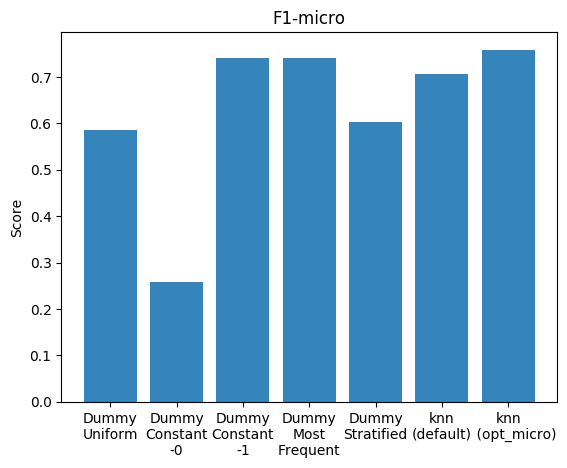

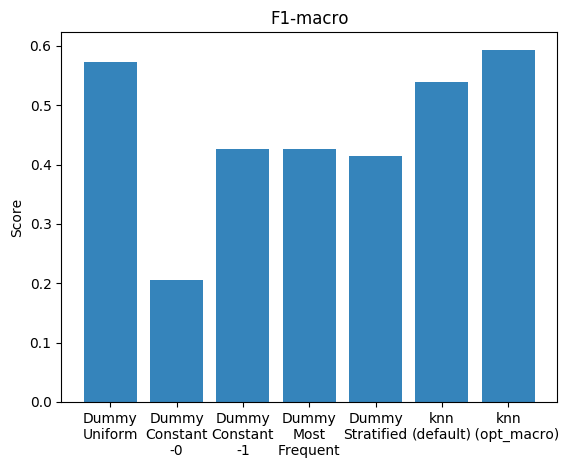

In [0]:
plot_bar(classifiers_micro, classifiers_f1_micro, "F1-micro")
plot_bar(classifiers_macro, classifiers_f1_macro, "F1-macro")

Βλέπουμε ότι, τελικώς, ο optimal knn ξεπέρασε τον καλυτερο dummy classifier τόσο στο f1_micro όσο και στο f1_macro, πετυχαίνοντας, έτσι, τον αρχικό μας στόχο.